In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/champions-league-era-stats/PlayerAppearDetails.csv
/kaggle/input/champions-league-era-stats/AllTimeRankingByClub.csv
/kaggle/input/champions-league-era-stats/TopGoalScorer.csv
/kaggle/input/champions-league-era-stats/PlayerGoalTotals.csv
/kaggle/input/champions-league-era-stats/PlayerGoalDetails.csv
/kaggle/input/champions-league-era-stats/CoachesAppearTotals.csv
/kaggle/input/champions-league-era-stats/CoachesAppearDetails.csv
/kaggle/input/champions-league-era-stats/GoalStatsPerGroupRound.csv
/kaggle/input/champions-league-era-stats/AllTimeRankingByCountry.csv
/kaggle/input/champions-league-era-stats/PlayerAppearTotals.csv


In [2]:
PATH = "/kaggle/input/champions-league-era-stats"

# The country with the most clubs to participate in the Champions League
Lets analyze the AllTimeRankingByClub which is the more detailed file.  The All Time RankingByCountry is the summary file which removes the club names and just adds up  the numbers per country.

You can use this dictionary if you'd like to convert between the country code and country name:

In [3]:
country_dict = { "ESP": "Spain", "ENG": "England", "ITA" :"Italy", "GER":"Germany", "POR": "Portugal",
               "FRA":"France", "NED":"Netherlands", "POL":"Poland", "ROU":"Romania", "RUS":"Russia", 
               "AUT":"Austria", "SCO":"Scotland", "SRB":"Serbia", "SUI":"Switzerland", "SVK":"Slovakia",
               "SVN":"SLovenia", "TUR":"Turkey", "NOR":"Norway", "ISR":"Israel", "KAZ":"Kazakhstan", 
               "AZE":"Azerbaijan", "HUN":"Hungary", "GRE":"Greece", "FIN":"Finland", "DEN":"Denmark", 
                "SWE":"Swedend", "CZE":"Czech Republic", "CYP":"Cyprus", "CRO": "Croatia", "BUL":"Bulgaria", 
                "BLR":"Belarus", "BEL":"Belguim", "UKR":"Ukraine", "MDA" :"Moldova", "IRL":"Ireland", 
                "ALB":"Albania" , "MLT":"Malta", "LVA":"Latvia", "NIR":"Northern Ireland", "LTU":"Lithuania", 
               "GEO":"Georgia", "ISL":"Iceland", "ARM":"Armenia", "BIH":"Bosnia and Herzegovina",
               "LUX":"Luxemborg", "MKD":"North Macedonia", "EST":"Estonia", "WAL":"Wales", "FRO":"Faroe Island",
               "MNE":"Montegro", "KOS":"Kosovo", "GIB":"Gibraltar", "AND":"Andorra", "SMR":"San Marino"}

In [4]:
AllTimeClub = pd.read_csv(os.path.join(PATH, "AllTimeRankingByClub.csv"), encoding='utf-16')
AllTimeClub.columns

Index(['Position', 'Club', 'Country', 'Participated', 'Titles', 'Played',
       'Win', 'Draw', 'Loss', 'Goals For', 'Goals Against', 'Pts',
       'Goal Diff'],
      dtype='object')

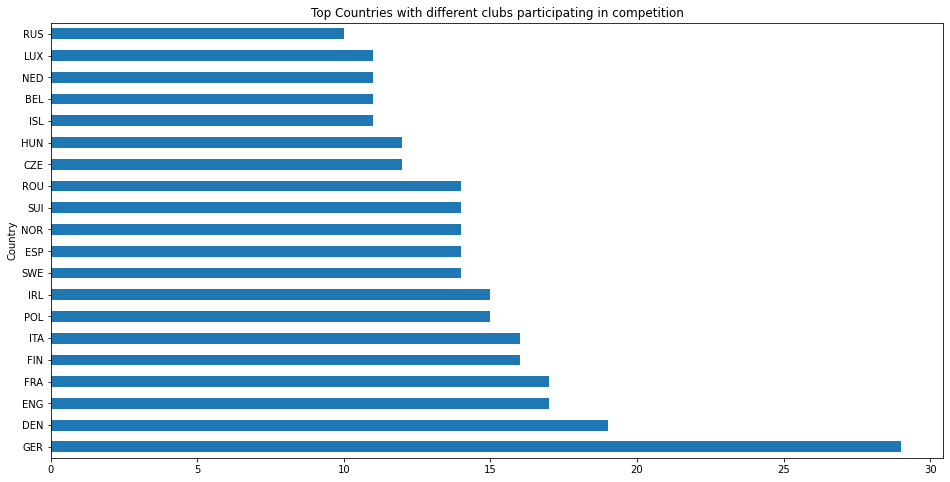

In [5]:
df = AllTimeClub.copy(deep=True)
plt.figure(figsize=(16,8))
plt.title("Top Countries with different clubs participating in competition")
df = df.groupby("Country")["Club"].count().sort_values(ascending=False)[:20].plot(kind='barh')

With the domination of the spanish clubs in the last decade I expected them to be in the top but the German clubs are a surprise for me. Even though both leagues have been dominated by a few clubs (2 in Spain and mostly 1 in Germany) it looks like overall the competition produces more balanced results for their clubs compared  other leagues by sending different clubs to Europe's top club competition

# Top scoring clubs per game in the competition

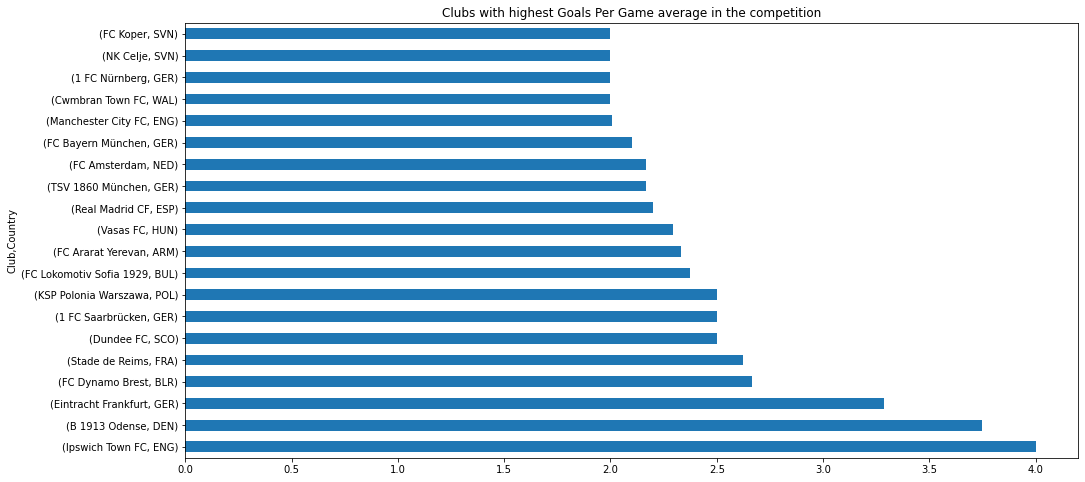

In [6]:
df = AllTimeClub.copy(deep=True)
df["GPG"] = df["Goals For"] / df["Played"]
plt.figure(figsize=(16,8))
plt.title("Clubs with highest Goals Per Game average in the competition")
df = df.groupby(["Club", "Country"])["GPG"].max().sort_values(ascending=False)[:20].plot(kind='barh')

This list has more surprising results than the country list.  PSG, Manchester City, Hoffenheim & Tottenham were not teams I was expecting to see so high in the list. Obviously the less games you participate in, while scoring many goals in those few games skews the results.  Lets confirm

So lets look at those clubs and how many games have they played or have participated in the competition.

In [7]:
df = AllTimeClub.copy(deep=True)
df["GPG"] = df["Goals For"] / df["Played"]
df = df.groupby("Club")["GPG"].max().sort_values(ascending=False)[:20]
AllTimeClub.loc[AllTimeClub["Club"].isin(df.index.tolist())]

,Position,Club,Country,Participated,Titles,Played,Win,Draw,Loss,Goals For,Goals Against,Pts,Goal Diff
0,1,Real Madrid CF,ESP,52,14,464,277,79,108,1021,508.0,633.0,513.0
1,2,FC Bayern München,GER,38,6,372,221,75,76,782,367.0,517.0,415.0
32,33,Manchester City FC,ENG,12,0,106,58,19,29,213,126.0,135.0,87.0
109,110,Stade de Reims,FRA,4,0,24,14,3,7,63,30.0,31.0,33.0
110,111,Vasas FC,HUN,6,0,27,12,6,9,62,34.0,30.0,28.0
199,200,1 FC Nürnberg,GER,2,0,8,5,1,2,16,14.0,11.0,2.0
216,217,FC Ararat Yerevan,ARM,1,0,6,5,0,1,14,5.0,10.0,9.0
217,218,Eintracht Frankfurt,GER,1,0,7,4,2,1,23,15.0,10.0,8.0
218,219,Dundee FC,SCO,1,0,8,5,0,3,20,14.0,10.0,6.0
231,232,FC Amsterdam,NED,1,0,6,4,1,1,13,4.0,9.0,9.0


We can see that at least 3 teams have only played once in the competition, while 3 others have participated 5 times or less.  There are many ways to slice and dice this dataset so please enjoy and share some of the interesting findings that you come up with.

In [8]:
del df

# Coach with the most appearances for a single club
We will analyze the CoachesAppearDetails file which has the details broken down by each club that the coach represented.  The CoachsAppearTotals is just the sum of this data without the club represented

In [9]:
CoachAppear = pd.read_csv(os.path.join(PATH, "CoachesAppearDetails.csv"), index_col='Unnamed: 0')
CoachAppear

,Coach,Club,Appearance
0,Sir Alex Ferguson,Manchester United FC,190
1,Carlo Ancelotti,FC Bayern München,12
2,Carlo Ancelotti,Juventus,10
3,Carlo Ancelotti,Chelsea FC,18
4,Carlo Ancelotti,AC Milan,73
...,...,...,...
107,Ernesto Valverde,FC Barcelona,28
108,Felix Magath,VfB Stuttgart,8
109,Felix Magath,FC Schalke 04,8
110,Felix Magath,FC Bayern München,24


Lets see who are the coaches with the most appearances with a single club and which club it was

In [10]:
df = CoachAppear.copy(deep=True)
df = df.groupby(["Coach", "Club"])["Appearance"].max().sort_values(ascending=False)[:10]
df

Coach                 Club                   
Sir Alex Ferguson     Manchester United FC       190
Arsène Wenger         Arsenal FC                 171
Diego Simeone         Club Atlético de Madrid     87
Marcello Lippi        Juventus                    76
Ottmar Hitzfeld       FC Bayern München           76
Carlo Ancelotti       AC Milan                    73
Mircea Lucescu        FC Shakhtar Donetsk         68
Josep Guardiola       Manchester City FC          62
Rafael Benítez        Liverpool FC                62
Massimiliano Allegri  Juventus                    62
Name: Appearance, dtype: int64

# Coach that represented the most clubs in the competition
And now lets looks at which coach has coached the most clubs in the competition, I expected Ancelotti to be up there but I didn't know that Koeman has coached so many diffeernt clubs, need to brush up on my CL history :)

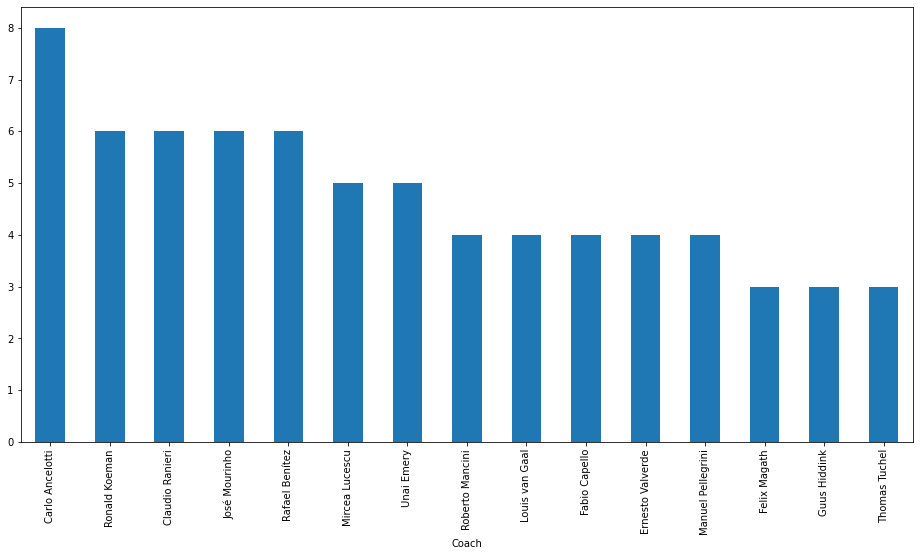

In [11]:
df = CoachAppear.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Coach"])["Club"].count().sort_values(ascending=False)[:15].plot(kind='bar')

In [12]:
del df

# Analyzing the Player appearances
This dataset looks very similar to the coaches data so lets repeat the same analysis.  The player that played the most games for a single club (Note: this player could play for multiple clubs but this is the most games for a club) is:

In [13]:
PlayerAppear = pd.read_csv(os.path.join(PATH, "PlayerAppearDetails.csv"), index_col='Unnamed: 0')
PlayerAppear

,Player,Club,Appearances
0,Cristiano Ronaldo,Real Madrid CF,101
1,Cristiano Ronaldo,Juventus,23
2,Cristiano Ronaldo,Manchester United FC,59
3,Iker Casillas,Real Madrid CF,150
4,Iker Casillas,FC Porto,27
...,...,...,...
658,Mathieu Flamini,Arsenal FC,42
659,Sadio Mané,Liverpool FC,(13)
660,Adrien Rabiot,Paris Saint-Germain,36
661,Adrien Rabiot,Juventus,19


In [14]:
df = PlayerAppear.copy(deep=True)
df = df.groupby(["Player", "Club"])["Appearances"].max().sort_values(ascending=False)[:15]
df

Player            Club                    
Luka Modrić       Real Madrid CF              99
Javier Zanetti    FC Internazionale Milano    97
Guti              Real Madrid CF              97
Petr Čech         Chelsea FC                  94
David Alaba       FC Bayern München           91
Samuel Eto’o      Chelsea FC                   9
Claudio Pizarro   SV Werder Bremen             9
Thierry Henry     AS Monaco FC                 9
Claude Makelele   FC Nantes                    9
Mikaël Silvestre  Arsenal FC                   9
Giovane Elber     Olympique Lyonnais           9
Wesley Sneijder   Real Madrid CF               9
Mark van Bommel   FC Barcelona                 9
Julian Draxler    VfL Wolfsburg                9
Gareth Bale       Tottenham Hotspur            9
Name: Appearances, dtype: object

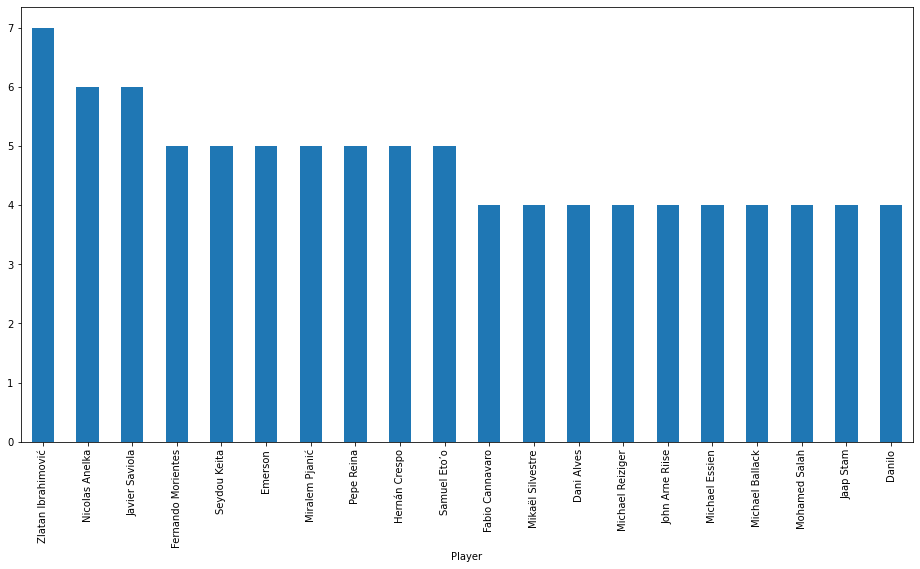

In [15]:
df = PlayerAppear.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Player"])["Club"].count().sort_values(ascending=False)[:20].plot(kind='bar')

# Analyzing the top goal scorers
Lets see which player scored the most goals for a single club by using the PlayerGoalDetails file.  The PlayerGoalTotals is just a summary of this data without the club information.

In [16]:
PlayerGoals = pd.read_csv(os.path.join(PATH, "PlayerGoalDetails.csv"), index_col='Unnamed: 0')
PlayerGoals.head(10)

,Player,Club,Goals
0,Ronaldo,Real Madrid CF,105
1,Ronaldo,Juventus,14
2,Ronaldo,Manchester United FC,21
3,Lionel Messi,FC Barcelona,120
4,Lionel Messi,Paris Saint-Germain,5
5,Karim Benzema,Olympique Lyonnais,12
6,Karim Benzema,Real Madrid CF,74
7,Robert Lewandowski,Borussia Dortmund,17
8,Robert Lewandowski,FC Bayern München,69
9,Raúl González,Real Madrid CF,66


In [17]:
df = PlayerGoals.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby(["Player", "Club"])["Goals"].max().sort_values(ascending=False)[:25]
df

Player                 Club                   
İlkay Gündoğan         Manchester City FC         9
Leroy Sané             FC Bayern München          9
Diego Costa            Club Atlético de Madrid    9
Sonny Anderson         Olympique Lyonnais         9
Fernando Morientes     AS Monaco FC               9
Bernardo Silva         Manchester City FC         9
Ivica Olić             FC Bayern München          9
Arturo Vidal           Juventus                   9
Zlatan Ibrahimović     AC Milan                   9
Peter Crouch           Liverpool FC               9
Patrick Kluivert       AFC Ajax                   9
Zinédine Zidane        Real Madrid CF             9
Michael Ballack        Bayer 04 Leverkusen        9
Alexis Sánchez         Arsenal FC                 9
Michalis Konstantinou  Panathinaikos FC           9
Miroslav Klose         FC Bayern München          9
Mario Götze            FC Bayern München          9
Zlatko Zahovič         FC Porto                   8
Erling Haaland   

<Figure size 1152x576 with 0 Axes>

Once again lets look at which player scored the most goals for different clubs

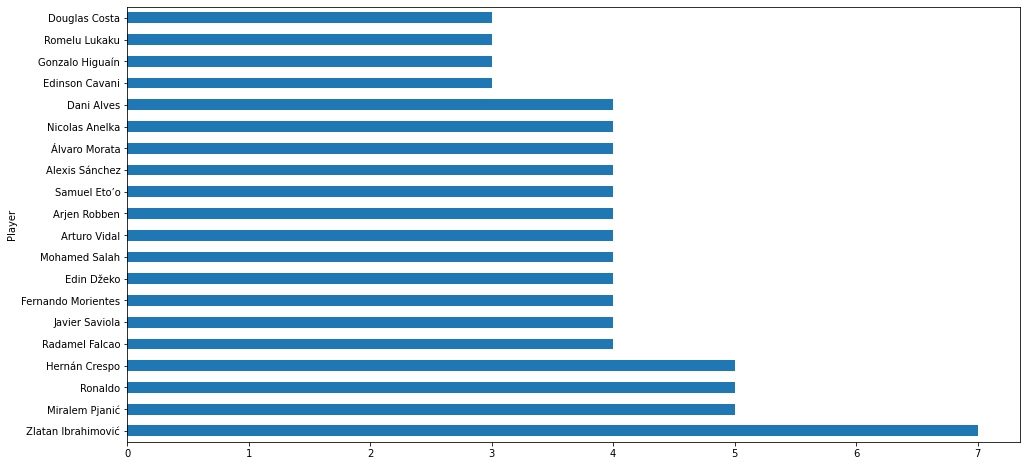

In [18]:
df = PlayerGoals.copy(deep=True)
plt.figure(figsize=(16,8))
df = df.groupby("Player")["Club"].count().sort_values(ascending=False)[:20].plot(kind='barh')